# Part-1

# Classification

***Check eligibility of the Customer given the inputs described above***

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np

**Read Dataset**

In [2]:
train_data = pd.read_csv('C:/Users/snket/OneDrive/Desktop/komal data notes/Data frames files/project 2_end to end/training_set.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train_data.shape

(614, 13)

**Missing Data Treatment**

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [7]:
cat = []
con = []

for i in train_data.columns:
    if(train_data[i].dtypes == 'object'):
        cat.append(i)
        x = train_data[i].mode()[0]
        train_data[i] = train_data[i].fillna(x)
    else:
        con.append(i)
        x = train_data[i].mean()
        train_data[i] = train_data[i].fillna(x)
        

**Check for duplicate values**

In [8]:
train_data.duplicated().sum()

0

**Outliers**

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_data1 = pd.DataFrame(ss.fit_transform(train_data[con]),columns=con) 

In [10]:
train_data1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072651,-0.554368,0.000000,0.279851,0.451640
1,0.000000,-0.038610,-0.219273,0.279851,0.451640
2,-0.394096,-0.554368,-0.957641,0.279851,0.451640
3,-0.462412,0.252103,-0.314547,0.279851,0.451640
4,0.097389,-0.554368,-0.064454,0.279851,0.451640
...,...,...,...,...,...
609,-0.410479,-0.554368,-0.898095,0.279851,0.451640
610,-0.212902,-0.554368,-1.267279,-2.518655,0.451640
611,0.436842,-0.472284,1.269371,0.279851,0.451640
612,0.356730,-0.554368,0.483367,0.279851,0.451640


In [11]:
def outliers(df):
    con = []
    for i in df.columns:
        if(df[i].dtypes != "object"):
            con.append(i)
    outliers = []
    for i in con:
        outliers.extend(list(df[df[i]>3].index))
        outliers.extend(list(df[df[i]<-3].index))
    from numpy import unique
    return list(unique(outliers))

In [12]:
OL = outliers(train_data1)

In [13]:
train_data = train_data.drop(index=OL,axis=0)

In [14]:
train_data.index = range(0,577,1)

**Define X and Y**

In [15]:
X = train_data.drop(labels=['Loan_Status','Loan_ID'],axis=1)
Y = train_data[['Loan_Status']]

**Preprocessing**

In [16]:
cat = []
con = []

for i in X.columns:
    if(X[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con) 
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)


In [18]:
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.398479,-0.860843,0.184585,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.248823,0.053073,-0.143355,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.562989,-0.860843,-1.247642,0.239408,0.456461,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.703717,0.568211,-0.285844,0.239408,0.456461,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.449438,-0.860843,0.088189,0.239408,0.456461,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.596737,-0.860843,-1.158587,0.239408,0.456461,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
573,-0.189741,-0.860843,-1.710730,-3.237229,0.456461,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
574,1.148688,-0.715392,2.083030,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
575,0.983662,-0.860843,0.907499,0.239408,0.456461,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


**Train_test_split**

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

**Build Model**

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=6,criterion="entropy",random_state=21,min_samples_split=14)
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
print('training_acc-',round(accuracy_score(ytrain,pred_tr),2))
print('testing_acc-',round(accuracy_score(ytest,pred_ts),2))

training_acc- 0.85
testing_acc- 0.85


In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytrain,pred_tr))
print(confusion_matrix(ytest,pred_ts))

[[ 83  61]
 [  7 310]]
[[19 16]
 [ 1 80]]


**Prepare Test Data**

In [22]:
test_data = pd.read_csv('C:/Users/snket/OneDrive/Desktop/komal data notes/Data frames files/project 2_end to end/testing_set.csv')

In [23]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [25]:
cat1 = []
con1 = []

for i in test_data.columns:
    if(test_data[i].dtypes == 'object'):
        cat1.append(i)
        x = test_data[i].mode()[0]
        test_data[i] = test_data[i].fillna(x)
    else:
        con1.append(i)
        x = test_data[i].mean()
        test_data[i] = test_data[i].fillna(x)

In [26]:
#test_data.info()

In [27]:
test_data1 = test_data.drop(labels=['Loan_ID'],axis=1)

In [28]:
cat2 = []
con2 = []

for i in test_data1.columns:
    if(test_data1[i].dtypes == 'object'):
        cat2.append(i)
    else:
        con2.append(i)

In [29]:

T1 = pd.DataFrame(ss.transform(test_data1[con2]),columns=con) 
T2 = pd.get_dummies(test_data1[cat2])
test_data2 = T1.join(T2)

In [30]:
test_data2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.354945,-0.860843,-0.463955,0.239408,0.456461,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.537341,0.048224,-0.178977,0.239408,0.456461,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.111962,0.230038,1.281532,0.239408,0.456461,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.785723,0.682148,-0.642065,0.239408,-0.037349,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.469846,-0.860843,-1.033909,0.239408,0.456461,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.222476,0.216099,-0.410521,0.239408,0.456461,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,-0.172192,-0.431157,-0.374899,0.239408,0.456461,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,-0.478620,0.347005,-0.178977,0.239408,-0.037349,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0.111962,0.589423,0.390977,0.239408,0.456461,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [31]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [32]:
test_data2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [33]:
final_pred = model.predict(test_data2)

In [34]:
final_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [35]:
test_data['predict_loan_status'] = final_pred


In [36]:
final_sub = test_data[['Loan_ID','predict_loan_status']]

**Final Predictions**

In [37]:
final_sub

,Loan_ID,predict_loan_status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# Part-2

# Clustering

***Identify customer segments from given data and categorize customer into one of the segments***

In [38]:
A = train_data

In [39]:
A

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,LP002978,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,Y
573,LP002979,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,Y
574,LP002983,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,Y
575,LP002984,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,Y


**Missing data treatment**

In [40]:
A1 = A.drop(labels=['Loan_ID'],axis=1)

In [41]:
cat = []
con = []

for i in A1.columns:
    if(A1[i].dtypes == 'object'):
        cat.append(i)
        x = A1[i].mode()[0]
        A1[i] = A1[i].fillna(x)
    else:
        con.append(i)
        x = A1[i].mean()
        A1[i] = A1[i].fillna(x)

In [42]:
A1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             577 non-null    object 
 1   Married            577 non-null    object 
 2   Dependents         577 non-null    object 
 3   Education          577 non-null    object 
 4   Self_Employed      577 non-null    object 
 5   ApplicantIncome    577 non-null    float64
 6   CoapplicantIncome  577 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   577 non-null    float64
 9   Credit_History     577 non-null    float64
 10  Property_Area      577 non-null    object 
 11  Loan_Status        577 non-null    object 
dtypes: float64(5), object(7)
memory usage: 54.2+ KB


In [43]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [44]:
A1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Preprocessing**

In [45]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
A2 = pd.DataFrame(mm.fit_transform(A1[con]),columns=con)
A3 = pd.get_dummies(A1[cat])
Anew = A2.join(A3)

In [46]:
Anew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.277770,0.000000,0.370383,0.6,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,0.256155,0.167929,0.320755,0.6,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,0.138909,0.000000,0.153639,0.6,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,0.118585,0.262584,0.299191,0.6,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,0.285129,0.000000,0.355795,0.6,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,0.134035,0.000000,0.167116,0.6,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
573,0.192816,0.000000,0.083558,0.0,1.0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
574,0.386119,0.026726,0.657682,0.6,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
575,0.362285,0.000000,0.479784,0.6,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


**Build Model**

In [47]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(Anew)

In [48]:
model.labels_

array([3, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 1, 1, 0, 1, 0, 1, 1,
       1, 2, 2, 0, 1, 3, 1, 1, 1, 2, 1, 0, 1, 2, 3, 3, 1, 3, 0, 2, 0, 3,
       0, 0, 1, 3, 2, 3, 3, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 3, 1, 1, 0,
       3, 0, 2, 3, 1, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 3, 2, 2,
       2, 0, 3, 1, 2, 2, 2, 2, 0, 3, 0, 2, 0, 0, 0, 1, 1, 2, 3, 2, 1, 3,
       3, 0, 2, 0, 1, 3, 0, 3, 3, 2, 0, 3, 3, 1, 1, 3, 3, 3, 1, 1, 0, 1,
       1, 1, 3, 3, 2, 0, 2, 0, 0, 3, 2, 1, 0, 1, 1, 3, 0, 0, 3, 2, 2, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0,
       0, 0, 3, 1, 1, 3, 3, 1, 3, 3, 2, 1, 2, 3, 1, 0, 2, 3, 3, 3, 3, 1,
       3, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 3, 2, 2, 1, 1, 2, 2, 3, 2, 0,
       3, 3, 2, 0, 1, 3, 3, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 3, 2, 1,
       3, 1, 1, 1, 1, 0, 3, 3, 3, 3, 2, 0, 3, 3, 3, 0, 3, 2, 2, 2, 2, 0,
       0, 1, 2, 0, 3, 1, 3, 3, 0, 3, 3, 0, 1, 0, 1, 2, 0, 2, 0, 3, 1, 1,
       2, 3, 0, 3, 1, 3, 1, 0, 3, 3, 3, 1, 0, 2, 0,

In [49]:
A['Cluster_no']=model.labels_

In [50]:
A[['Loan_ID','Cluster_no']] 

,Loan_ID,Cluster_no
0,LP001002,3
1,LP001003,1
2,LP001005,0
3,LP001006,0
4,LP001008,3
...,...,...
572,LP002978,3
573,LP002979,0
574,LP002983,0
575,LP002984,0


In [51]:
k = range(1,15,1)
WCSS = []
for i in k:
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=i)
    model = km.fit(Anew)
    WCSS.append(model.inertia_)

Text(0.5, 1.0, 'Elbow curve')

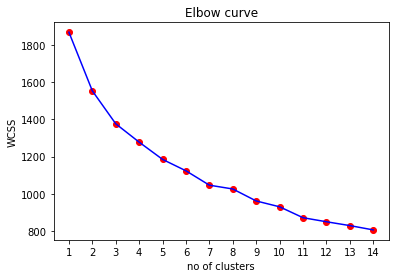

In [52]:
import matplotlib.pyplot as plt
plt.scatter(k,WCSS,c="red")
plt.plot(k,WCSS,c="blue")
plt.xticks(range(1,15,1))
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")

# Part-3

# **Regression**

**If customer is not eligible for the input required amount and duration:**
    
**a). what can be amount for the given duration.(Regression)**

**Read Dataset**

In [53]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Cluster_no
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y,3
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,LP002978,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,Y,3
573,LP002979,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,Y,0
574,LP002983,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,Y,0
575,LP002984,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,Y,0


**Define X and Y**

In [54]:
X = train_data.drop(labels=['LoanAmount','Loan_ID','Cluster_no'],axis=1)
Y = train_data[['LoanAmount']]

**Preprocessing**

In [55]:
cat = []
con = []

for i in X.columns:
    if(X[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [56]:
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con) 
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [57]:
Xnew

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.398479,-0.860843,0.239408,0.456461,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
1,0.248823,0.053073,0.239408,0.456461,0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,-0.562989,-0.860843,0.239408,0.456461,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
3,-0.703717,0.568211,0.239408,0.456461,0,1,0,1,1,0,...,0,0,1,1,0,0,0,1,0,1
4,0.449438,-0.860843,0.239408,0.456461,0,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.596737,-0.860843,0.239408,0.456461,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
573,-0.189741,-0.860843,-3.237229,0.456461,0,1,0,1,0,0,...,1,1,0,1,0,1,0,0,0,1
574,1.148688,-0.715392,0.239408,0.456461,0,1,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
575,0.983662,-0.860843,0.239408,0.456461,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1


**Model**

In [58]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)

In [59]:
print(tr_err)
print(ts_err)

1884.6233855188252
1942.2605335911348


**Ridge**

In [60]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=62.7)
model_rr = rr.fit(xtrain,ytrain)

tr_pred = model_rr.predict(xtrain)
ts_pred = model_rr.predict(xtest)

from sklearn.metrics import mean_squared_error
ts_err = mean_squared_error(ytest,ts_pred)
tr_err = mean_squared_error(ytrain,tr_pred)

print('tr_err---',tr_err)
print('ts_err---',ts_err)

tr_err--- 1917.0722578429052
ts_err--- 1917.5241718697503


**Lasso**

In [61]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.781)
model_ls = ls.fit(xtrain,ytrain)

tr_pred = model_ls.predict(xtrain)
ts_pred = model_ls.predict(xtest)

from sklearn.metrics import mean_squared_error
ts_err = mean_squared_error(ytest,ts_pred)
tr_err = mean_squared_error(ytrain,tr_pred)

print('tr_err---',tr_err)
print('ts_err---',ts_err)

tr_err--- 1916.0476909913405
ts_err--- 1916.6995213837463


**Test Data Preparation**

In [62]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict_loan_status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural,Y


In [63]:
cust_not_eligible1 = test_data[test_data['predict_loan_status'] == 'N']

In [64]:
cust_not_eligible1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict_loan_status
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.000000,Rural,N
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.000000,Semiurban,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.000000,Semiurban,N
55,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.000000,Urban,N
58,LP001323,Female,Yes,2,Graduate,No,2779,3664,176.0,360.0,0.000000,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.000000,Rural,N
342,LP002869,Male,Yes,3+,Not Graduate,No,3522,0,81.0,180.0,1.000000,Rural,N
346,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.000000,Rural,N
354,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.000000,Semiurban,N


In [65]:
cust_not_eligible1.index = range(0,65,1)

In [66]:
cust_not_eligible1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict_loan_status
0,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.000000,Rural,N
1,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.000000,Semiurban,N
2,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.000000,Semiurban,N
3,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.000000,Urban,N
4,LP001323,Female,Yes,2,Graduate,No,2779,3664,176.0,360.0,0.000000,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.000000,Rural,N
61,LP002869,Male,Yes,3+,Not Graduate,No,3522,0,81.0,180.0,1.000000,Rural,N
62,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.000000,Rural,N
63,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.000000,Semiurban,N


In [67]:
cust_not_eligible = cust_not_eligible1

In [68]:
cust_not_eligible=cust_not_eligible1.drop(labels=['Loan_ID','LoanAmount'],axis=1)

In [69]:
cust_not_eligible

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,predict_loan_status
0,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.000000,Rural,N
1,Male,Yes,2,Graduate,No,12173,0,360.0,0.000000,Semiurban,N
2,Male,No,0,Graduate,No,3150,0,360.0,0.000000,Semiurban,N
3,Male,No,0,Graduate,No,2750,0,360.0,0.000000,Urban,N
4,Female,Yes,2,Graduate,No,2779,3664,360.0,0.000000,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...
60,Female,No,0,Graduate,No,4333,2333,360.0,0.000000,Rural,N
61,Male,Yes,3+,Not Graduate,No,3522,0,180.0,1.000000,Rural,N
62,Male,Yes,0,Graduate,No,3391,1966,360.0,0.000000,Rural,N
63,Male,Yes,3+,Not Graduate,No,5316,187,180.0,0.000000,Semiurban,N


In [70]:
cat = []
con = []

for i in cust_not_eligible.columns:
    if(cust_not_eligible[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [71]:
T1 = pd.DataFrame(ss.transform(cust_not_eligible[con]),columns=con) 
T2 = pd.get_dummies(cust_not_eligible[cat])
Tnew = T1.join(T2)

In [72]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_N',
       'Loan_Status_Y'],
      dtype='object')

In [73]:
Tnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban',
       'predict_loan_status_N'],
      dtype='object')

In [74]:
Tnew['Loan_Status_Y']=0

In [75]:
final_pred= model_ls.predict(Tnew)

In [76]:
final_pred

array([113.59723025, 199.30090425, 104.52525754,  98.48997053,
       156.44570786, 109.93714341, 117.23710009, 107.49229884,
       169.40806509, 132.88100106, 122.34245144, 107.99971197,
       159.00831173,  98.30096604, 112.60392839, 133.93743326,
       123.42473771, 135.90579309, 188.62545965, 189.94648437,
       135.15639924, 117.8440764 , 151.04823465, 154.19403833,
       133.76452511, 102.70660267, 137.28044155,  93.37508328,
       115.80615643, 137.23755984, 119.65994521, 132.77714904,
       119.21409169, 154.67978889, 131.80469672, 127.1707057 ,
       113.08923552, 163.26065225, 158.40224427, 127.00564247,
       127.64777168, 133.44516582, 167.28040445, 120.39652727,
       133.70491037, 121.12239287, 140.96550875, 123.78276454,
        99.56952834, 158.5861797 , 135.7021032 , 146.03233164,
       142.03645492, 104.07125675, 127.78725762, 118.5802562 ,
       139.75218676, 174.80113973, 127.6278107 , 118.25702799,
       143.78149477, 102.25856087, 133.23376077, 124.42

In [77]:
cust_not_eligible1['eligible_amount_loan'] = final_pred

**Final Prediction**

In [78]:
cust_not_eligible1[['Loan_ID','LoanAmount','eligible_amount_loan','Loan_Amount_Term']]

,Loan_ID,LoanAmount,eligible_amount_loan,Loan_Amount_Term
0,LP001056,147.0,113.597230,360.0
1,LP001094,166.0,199.300904,360.0
2,LP001203,176.0,104.525258,360.0
3,LP001313,130.0,98.489971,360.0
4,LP001323,176.0,156.445708,360.0
...,...,...,...,...
60,LP002858,162.0,143.781495,360.0
61,LP002869,81.0,102.258561,180.0
62,LP002879,133.0,133.233761,360.0
63,LP002921,158.0,124.422364,180.0


# Part-4

**b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration?
What is that duration?(Regression)**

In [79]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Cluster_no
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y,3
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,LP002978,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,Y,3
573,LP002979,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,Y,0
574,LP002983,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,Y,0
575,LP002984,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,Y,0


In [80]:
# covertt Loan_Amount_Term into years

In [81]:
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term']/12

In [82]:
#train_data

**Define X and Y**

In [83]:
X = train_data.drop(labels=['Loan_Amount_Term','Loan_ID','Cluster_no'],axis=1)
Y = train_data[['Loan_Amount_Term']]

**Preprocessing**

In [84]:
cat = []
con = []

for i in X.columns:
    if(X[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [85]:
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con) 
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [86]:
Xnew = Xnew.drop(labels=['Loan_Status_N'],axis=1)

**Spilt data into training and testing set**

In [87]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

**Build Model**

In [88]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_leaf=28)
model = dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)

print("training_error :-->",tr_err)
print("testing_error :-->",ts_err)


training_error :--> 16.14188691610657
testing_error :--> 19.59792737714716


**Test data preparation**

In [89]:
test_data 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict_loan_status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural,Y


In [90]:
#convert Loan_Amount_Term into years

In [91]:
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term']/12

In [92]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict_loan_status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,30.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,30.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,30.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,30.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,30.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,30.0,1.000000,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,30.0,1.000000,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,30.0,0.825444,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,30.0,1.000000,Rural,Y


In [93]:
#filter custmers are eligible for loan and having less than 20yrs duration

In [94]:
test_data = test_data[(test_data['Loan_Amount_Term'] <= 20) & (test_data['predict_loan_status'] == 'Y')]

In [95]:
test_data.shape

(27, 13)

In [96]:
test_data.index = range(0,27,1)

In [97]:
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predict_loan_status
0,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,20.0,1.000000,Urban,Y
1,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,15.0,0.825444,Urban,Y
2,LP001115,Male,No,0,Graduate,No,1300,3470,100.0,15.0,1.000000,Semiurban,Y
3,LP001124,Female,No,3+,Not Graduate,No,2083,0,28.0,15.0,1.000000,Urban,Y
4,LP001176,Male,No,0,Graduate,No,2942,2382,125.0,15.0,1.000000,Urban,Y
5,LP001208,Male,Yes,2,Graduate,No,7350,4029,185.0,15.0,1.000000,Urban,Y
6,LP001298,Male,Yes,2,Graduate,No,4116,1000,30.0,15.0,1.000000,Urban,Y
7,LP001321,Male,Yes,2,Graduate,No,3613,3539,134.0,15.0,1.000000,Semiurban,Y
8,LP001324,Male,Yes,3+,Graduate,No,4720,0,90.0,15.0,1.000000,Semiurban,Y
9,LP001375,Male,Yes,1,Graduate,No,4083,1775,139.0,5.0,1.000000,Urban,Y


In [98]:
test_data1 = test_data.drop(labels=['Loan_Amount_Term','Loan_ID'],axis=1)

In [99]:
test_data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,predict_loan_status
0,Male,Yes,2,Graduate,No,13633,0,280.0,1.000000,Urban,Y
1,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban,Y
2,Male,No,0,Graduate,No,1300,3470,100.0,1.000000,Semiurban,Y
3,Female,No,3+,Not Graduate,No,2083,0,28.0,1.000000,Urban,Y
4,Male,No,0,Graduate,No,2942,2382,125.0,1.000000,Urban,Y
5,Male,Yes,2,Graduate,No,7350,4029,185.0,1.000000,Urban,Y
6,Male,Yes,2,Graduate,No,4116,1000,30.0,1.000000,Urban,Y
7,Male,Yes,2,Graduate,No,3613,3539,134.0,1.000000,Semiurban,Y
8,Male,Yes,3+,Graduate,No,4720,0,90.0,1.000000,Semiurban,Y
9,Male,Yes,1,Graduate,No,4083,1775,139.0,1.000000,Urban,Y


In [100]:
cat = []
con = []

for i in test_data1.columns:
    if(test_data1[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [101]:
T1 = pd.DataFrame(ss.transform(test_data1[con]),columns=con) 
T2 = pd.get_dummies(test_data1[cat])
Tnew = T1.join(T2)

In [102]:
Tnew.shape

(27, 20)

In [103]:
Tnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'predict_loan_status_Y'],
      dtype='object')

In [104]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [105]:
#Tnew['Loan_Status_N']=0

In [106]:
Tnew.shape

(27, 20)

In [107]:
final_pred= model.predict(Tnew)

In [108]:
final_pred

array([27.67857143, 28.875     , 29.47368421, 28.875     , 28.875     ,
       27.78787879, 26.60714286, 27.78787879, 26.60714286, 26.86046512,
       27.78787879, 26.60714286, 28.875     , 28.875     , 30.        ,
       27.67857143, 26.86046512, 30.        , 26.60714286, 29.95      ,
       29.47368421, 28.875     , 29.20689655, 26.60714286, 26.86046512,
       27.78787879, 29.95      ])

In [109]:
P = test_data[['Loan_ID','Loan_Amount_Term','LoanAmount']]

In [110]:
P['predicted_Loan_Amount_Term']=final_pred

**Final Prediction**

In [111]:
P

,Loan_ID,Loan_Amount_Term,LoanAmount,predicted_Loan_Amount_Term
0,LP001059,20.0,280.0,27.678571
1,LP001083,15.0,40.0,28.875000
2,LP001115,15.0,100.0,29.473684
3,LP001124,15.0,28.0,28.875000
4,LP001176,15.0,125.0,28.875000
5,LP001208,15.0,185.0,27.787879
6,LP001298,15.0,30.0,26.607143
7,LP001321,15.0,134.0,27.787879
8,LP001324,15.0,90.0,26.607143
9,LP001375,5.0,139.0,26.860465
